Introduction


This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

Has life expectancy increased over time in the six nations?
Has GDP increased over time in the six nations?
Is there a correlation between GDP and life expectancy of a country?
What is the average life expectancy in these nations?
What is the distribution of that life expectancy?
Data sources

GDP Source: World Bank national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Exploring the data

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
all_data.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
all_data['Country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [6]:
all_data['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

This data represent life expectancy and gdp of 6 countries over 15 years (2000-2015)

#Finding mean life expectancy and gdp of countries

In [7]:
means = all_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [8]:
means

,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


In [9]:
#Exploring life expectancy

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Chile'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'United States of America'),
  Text(5, 0, 'Zimbabwe')])

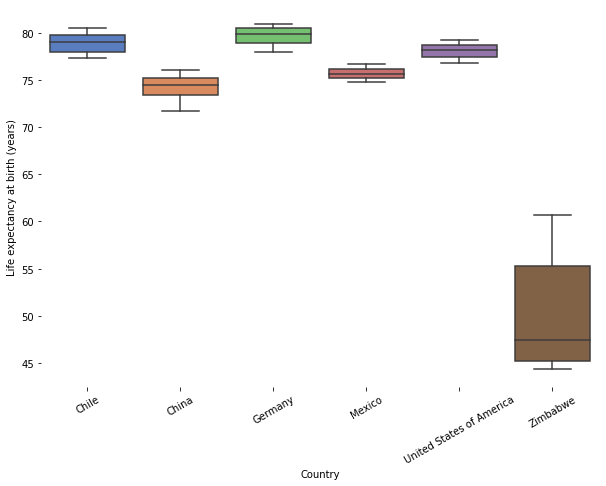

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.set_palette("muted")
sns.boxplot(x='Country', y='Life expectancy at birth (years)', data= all_data)
sns.despine(left=True, bottom=True)
plt.xticks(rotation = 30)

The boxplot is represent about Life Expectancy and all of the countries except for Zimbabwe have values in the higher 70s.

#Creating linegraph of life expectancy of countries over the years

In [11]:
def all_countries(df):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax = plt.subplot()
    
    for country in set(df['Country']):
        country_data = df[df['Country'] == country]
        ax.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], label = country)
        
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
        plt.xlabel('Years')
        plt.ylabel('Life expectancy')
    return plt.show()

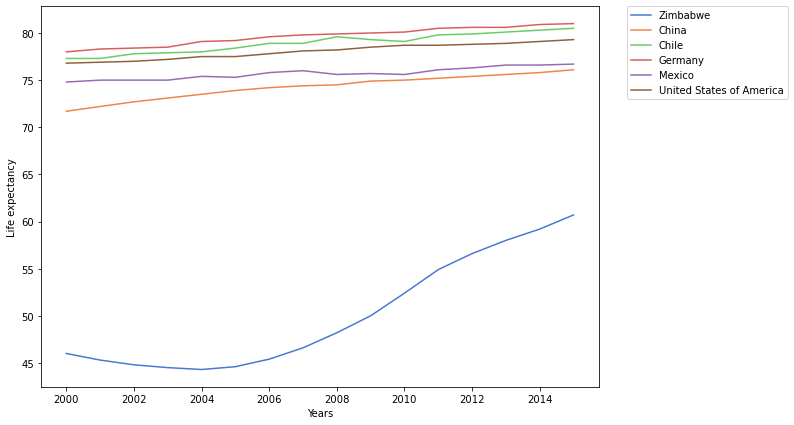

In [12]:
all_countries(all_data)

We can see that life expectancy is gradually increase over the years, and Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

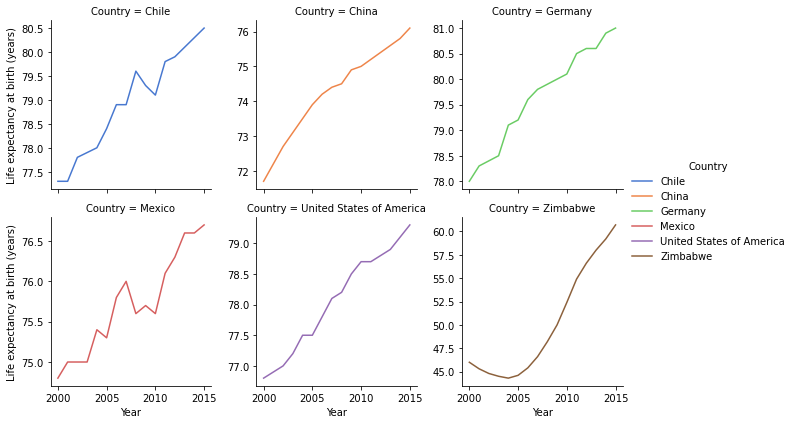

In [13]:
graph_le = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graph_le = (graph_le.map(sns.lineplot,"Year","Life expectancy at birth (years)")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graph_le;

In this graph we can see more accurately. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries. 

In [14]:
#Exploring GDP

In [15]:
def countries_gdp(df):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax = plt.subplot()
    
    for country in set(df['Country']):
        country_data = df[df['Country'] == country]
        ax.plot(country_data['Year'], country_data['GDP'], label = country)
        
        ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
        plt.xlabel('Years')
        plt.ylabel('GDP in Trillions of U.S. Dollars')
    return plt.show()

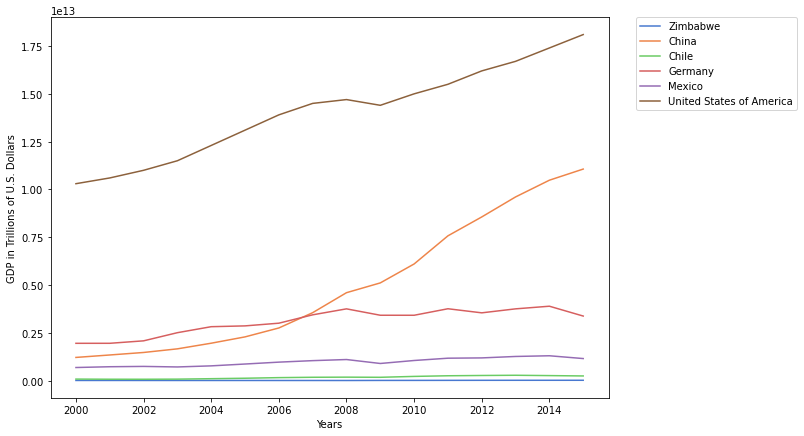

In [16]:
countries_gdp(all_data)

This graph explore GDP over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

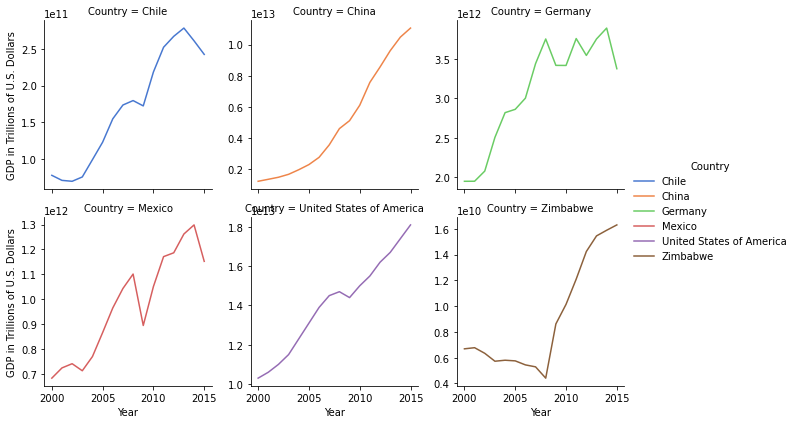

In [17]:
graph_gdp = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graph_gdp = (graph_gdp.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graph_gdp;

In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their GDP over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

#Scatterplot of relationship between GDP and life expectancy

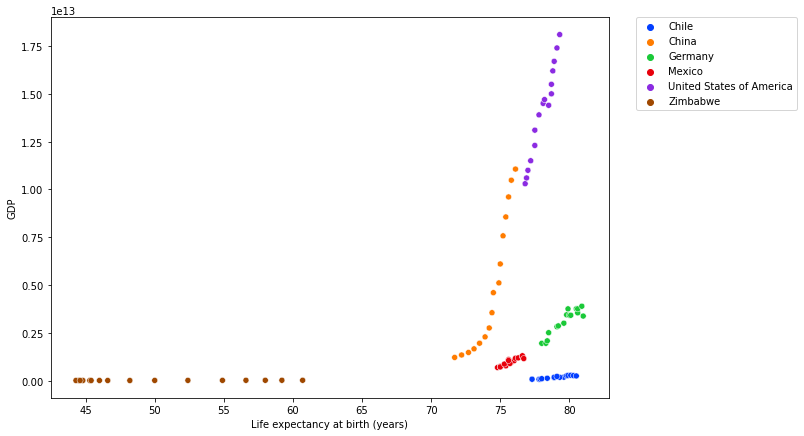

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

sns.scatterplot(x = 'Life expectancy at birth (years)', y = 'GDP', hue = 'Country', palette = 'bright', data = all_data)
ax.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

In the chart, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions posed in the beginning:

Has life expectancy increased over time in the six nations?
Yes with Zimbabwe having the greatest increase.
Has GDP increased over time in the six nations?
GDP has also increased for all countries in our list, especially for China.
Is there a correlation between GDP and life expectancy of a country?
Yes there is a positive correlation between GDP and life expectancy for countries in our list.
What is the average life expectancy in these nations?
Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
What is the distribution of that life expectancy?
the life expectancy had a left skew, or most of the observations were on the right side.